Import Libraires


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Data Collection

In [3]:
# Load the dataset
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
# Display the first few rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


EDA & Pre-Processing

In [5]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [6]:
# Get summary statistics of the dataset
print("\nSummary Statistics:\n")
data.describe()


Summary Statistics:



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Get the distribution of the target variable (Personal Loan)
print("\nTarget Variable Distribution:\n", data['Personal Loan'].value_counts(normalize=True))


Target Variable Distribution:
 Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


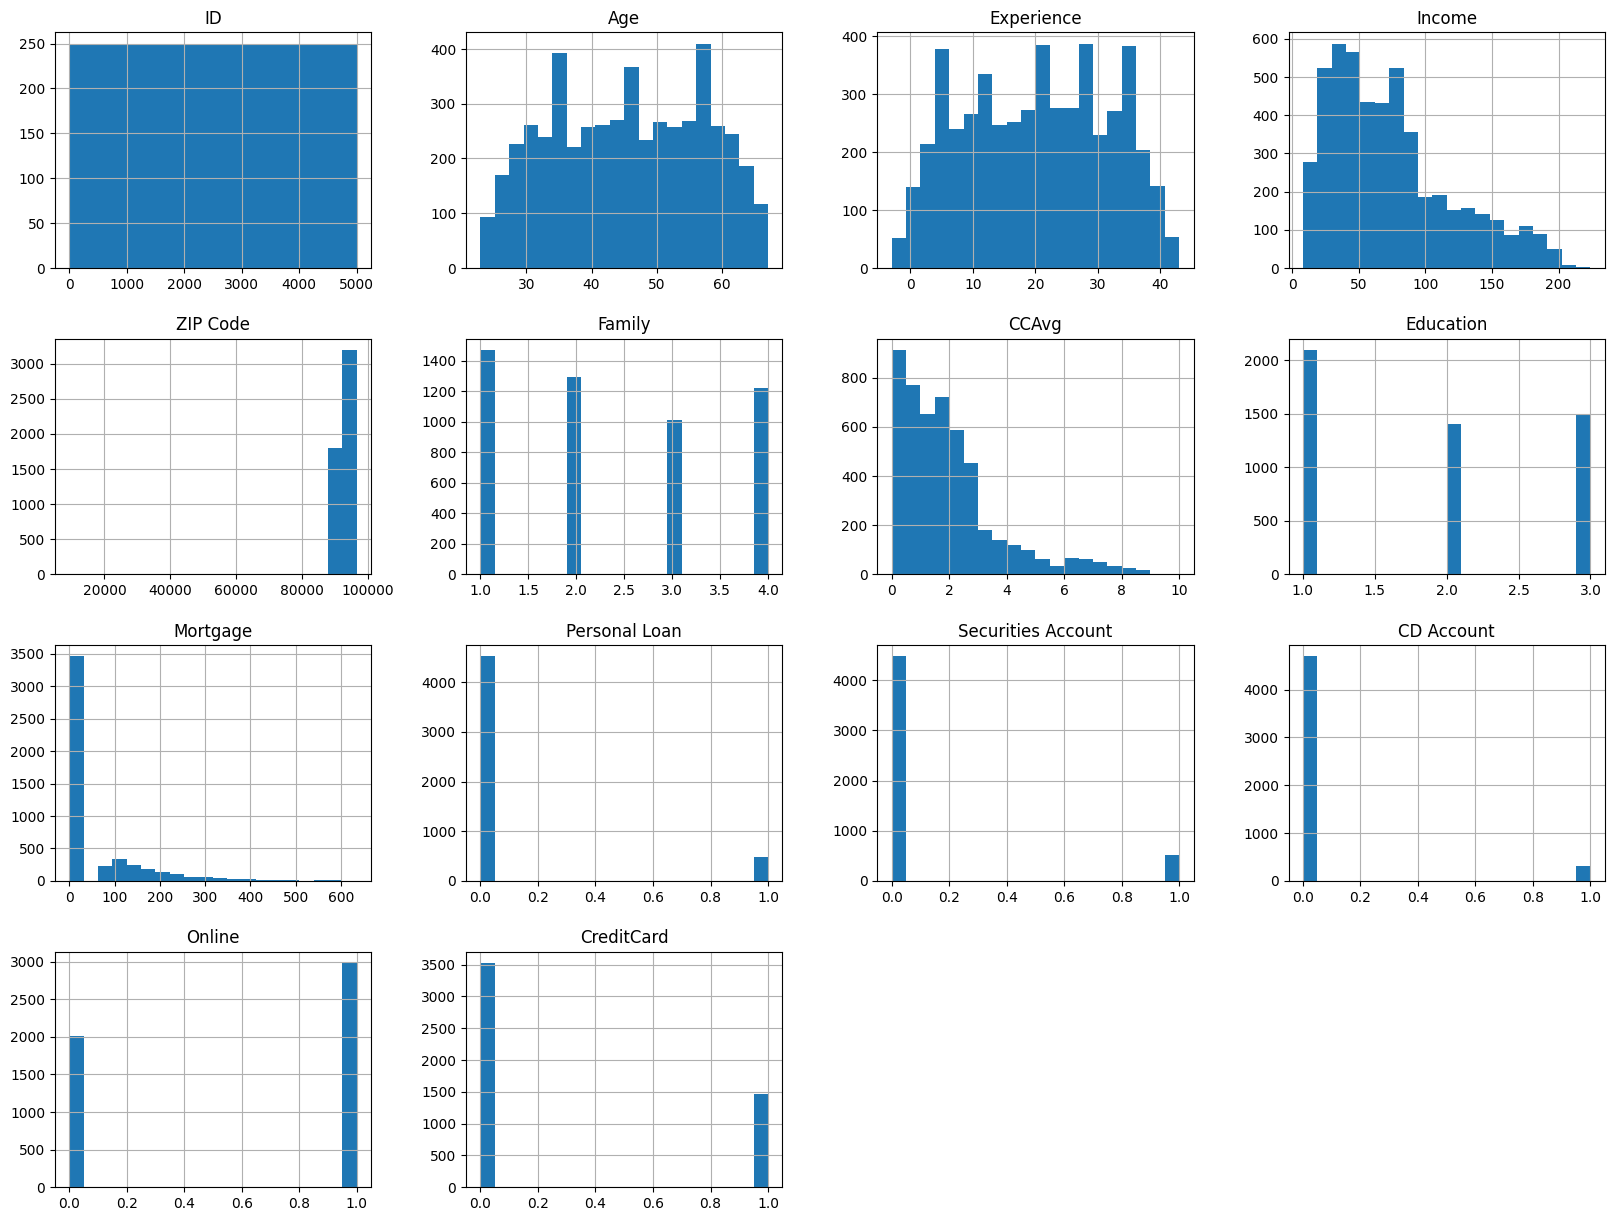

In [8]:
# Plot the distribution of numerical features
data.hist(bins=20, figsize=(20, 15))
plt.show()

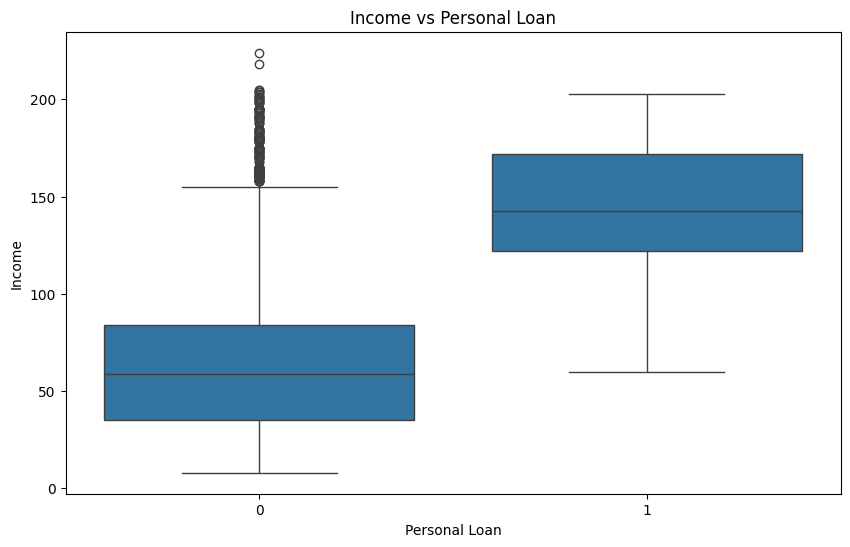

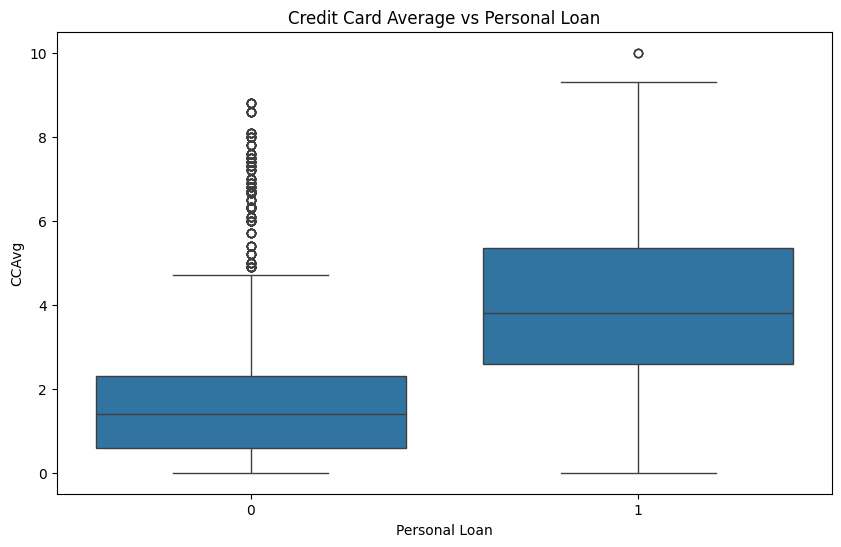

In [9]:
# Boxplot to see the outliers in Income and CCAvg
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal Loan', y='Income', data=data)
plt.title('Income vs Personal Loan')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal Loan', y='CCAvg', data=data)
plt.title('Credit Card Average vs Personal Loan')
plt.show()

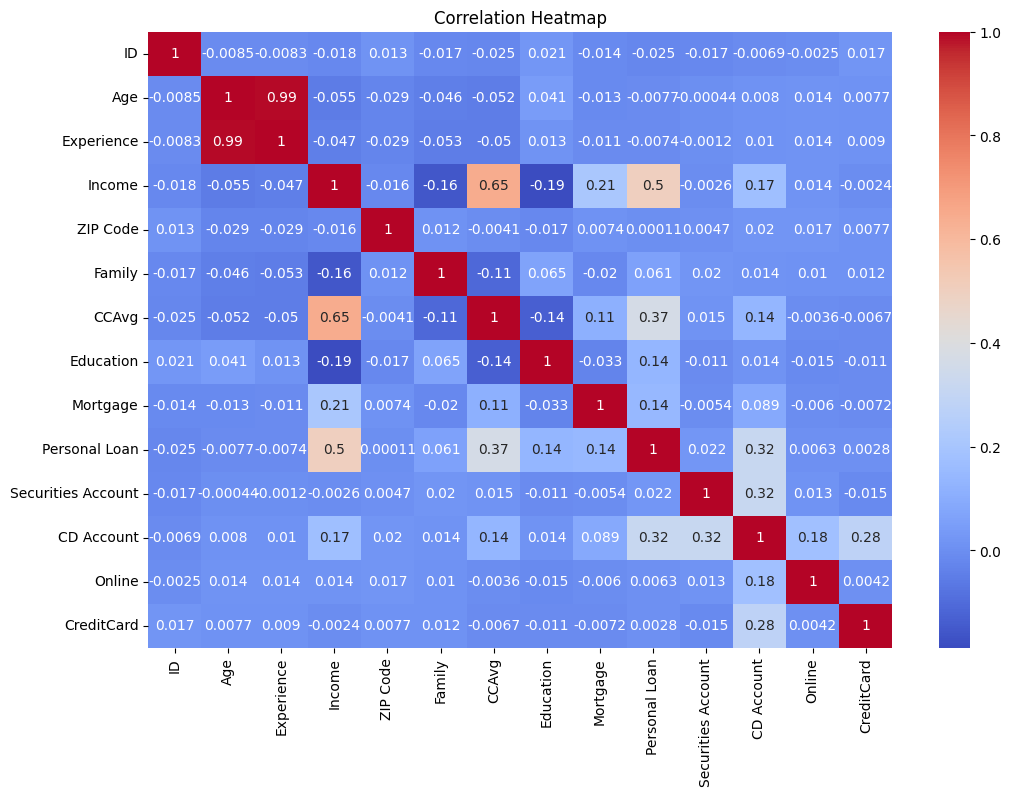

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering & Split

In [11]:
# Drop the ID and ZIP Code columns as they are not needed for modeling
X = data.drop(columns=['ID', 'ZIP Code', 'Personal Loan'])
y = data['Personal Loan']

In [12]:
# Standardize the numerical features
scaler = StandardScaler()
X[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']] = scaler.fit_transform(X[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])

In [13]:
# Split the data into training and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# Check the shape of the training and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3500, 11) (1500, 11) (3500,) (1500,)


Model Selection & Evaluation

In [15]:
# Initialize the models
logistic_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [16]:
# Train the models
logistic_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

In [17]:
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

In [18]:
# Generate confusion matrices
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [19]:
# Print the confusion matrices
print("Confusion Matrix - Logistic Regression:\n", cm_logistic)
print("Confusion Matrix - K-NN:\n", cm_knn)
print("Confusion Matrix - Naive Bayes:\n", cm_nb)

Confusion Matrix - Logistic Regression:
 [[1335   21]
 [  54   90]]
Confusion Matrix - K-NN:
 [[1354    2]
 [  53   91]]
Confusion Matrix - Naive Bayes:
 [[1238  118]
 [  62   82]]


In [20]:
# Generate and print classification reports
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_logistic))
print("Classification Report - K-NN:\n", classification_report(y_test, y_pred_knn))
print("Classification Report - Naive Bayes:\n", classification_report(y_test, y_pred_nb))


Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.81      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500

Classification Report - K-NN:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.98      0.63      0.77       144

    accuracy                           0.96      1500
   macro avg       0.97      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500

Classification Report - Naive Bayes:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1356
           1       0.41      0.57      0.48       144

    accuracy                           0.88      1500
   macro avg

In [24]:
# Calculate and print accuracy scores
acc_logistic = accuracy_score(y_test, y_pred_logistic)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("\nAccuracy - Logistic Regression:", acc_logistic)
print("Accuracy - K-NN:", acc_knn)
print("Accuracy - Naive Bayes:", acc_nb)


Accuracy - Logistic Regression: 0.95
Accuracy - K-NN: 0.9633333333333334
Accuracy - Naive Bayes: 0.88


In [26]:
# Choose the best model based on the evaluation metrics
# Compare based on accuracy, precision, recall, and F1-score
# Select the model that performs the best and fits the business requirements

# Example selection logic (can be customized based on results):
best_model = logistic_model if acc_logistic > acc_knn and acc_logistic > acc_nb else knn_model if acc_knn > acc_nb else nb_model

print("\nBest Model Selected:", best_model.__class__.__name__)


Best Model Selected: KNeighborsClassifier
